<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/PROBABILIT%C3%80_2309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilità
___

Addattamento da: 
- Probability for Computer Science, D. Forsyth, Springer Nature, 2018
- Probability and Statistics for Computer Scientists, M. Baron, CRC Press, 2014

Eseguiremo degli esperimenti - che potrebbero essere praticamente qualsiasi cosa, dal lancio di una moneta, al mangiare troppi grassi saturi,
al fumo, all'attraversare la strada senza guardare - e ragioneremo sui risultati (per lo più negativi per gli esempi che ho fatto). Ma
questi esiti sono incerti e dobbiamo soppesare le incertezze l'una con l'altra.

Se lancio una moneta, posso ottenere testa o croce, e non c'è motivo di aspettarsi di vederne uno più spesso dell'altro. Se mangio troppi grassi saturi o fumo, avrò molto probabilmente dei problemi, anche se non è detto. Se attraverso la strada senza guardare, potrei essere schiacciato da un camion oppure no.
**I nostri metodi devono tenere conto anche delle informazioni**. Se guardo prima di attraversare la strada, ho molte meno probabilità di essere schiacciato.



> La probabilità è il meccanismo che utilizziamo per descrivere e tenere conto del fatto che alcuni risultati sono più frequenti di altri.



Immaginate di ripetere lo stesso esperimento più volte. Non ci si aspetta necessariamente di vedere ogni volta lo stesso risultato.



> Alcuni risultati potrebbero verificarsi più frequentemente di altri. Per tenere conto di questa tendenza utilizziamo la probabilità.



Per farlo, dobbiamo essere chiari su quali risultati può avere un esperimento. Ad esempio, si lancia una moneta. Potremmo essere d'accordo sul fatto che gli unici risultati possibili sono testa o croce, ignorando così le possibilità che (ad esempio) un uccello scenda in picchiata e rubi la moneta; che la moneta atterri e rimanga in bilico; che la moneta cada in un angolo e rimanga sul bordo; la moneta cada tra le fessure del pavimento e scompaia; e così via.

Così facendo, abbiamo *idealizzato l'esperimento*.

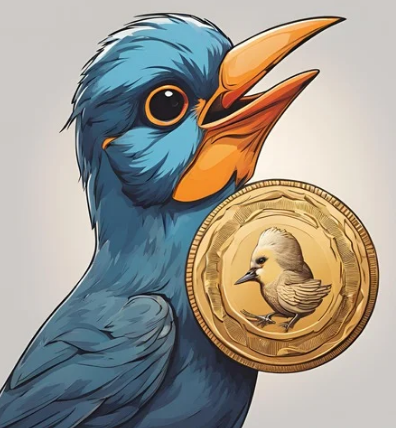

## Esiti di un esperimento aleatorio

Formalizzeremo gli esperimenti specificando l'insieme degli **esiti** che ci aspettiamo dall'esperimento. Ogni esecuzione dell'esperimento produce **esattamente uno** dei risultati possibili. Non si vedono mai due o più risultati da un singolo esperimento e non vediamo mai *nessun* risultato.

Il vantaggio di ragionare in questo modo è che possiamo contare la frequenza con cui ogni esito appare (e quindi definirne la probabilità).




> Definizione **Spazio campione**: Lo spazio campione è l'insieme di tutti gli esiti possibili di un esperimento aleatorio, e verrà indicato con la lettera Omega maiuscola ($\Omega$).





> Esempio: Abbiamo tre carte da gioco. Una è una regina, una è un re e una è un fante. Tutte vengono messe a faccia in giù e una viene scelta a caso e girata. *Qual è l'insieme dei risultati?*


*Soluzione*: Scrivete $Q$ per regina, $K$ per re, $J$ per fante; i risultati possibili saranno nell'insieme: $\Omega = \{Q; K; J\}$

> Giochiamo a trovare la regina due volte, sostituendo la carta che abbiamo scelto. Qual è è lo spazio campione?


*Soluzione:* $ \Omega = \{QQ; QK; QN; KQ; KK; KJ; JQ; JK; JJ\} $

> *Esempio*: Una coppia decide di avere dei figli. Poiché non conoscono la matematica, decidono di avere figli finché non nasce (in sequenza) una femmina e poi un maschio. Qual è lo spazio campionario? Questa strategia *limita* il numero di figli che potrebbero avere?

*Soluzione*: Scrivere $B$ per maschio, $G$ per femmina. Lo spazio campione è costituito da una qualsiasi stringa di $B$ e $G$ che (a) termina con $GB$ e (b)
non contiene altri $GB$.

Nella notazione delle *espressioni regolari*, è possibile scrivere tali stringhe come $B*G^+B$. Esiste un limite inferiore alla lunghezza della stringa (due), ma nessun limite superiore. Come strategia di pianificazione familiare, questa non è realistica, ma serve a illustrare il fatto che **gli spazi campionari non devono essere necessariamente finiti per essere trattabili.**

In [1]:
import random

def generate_children():
  """Generates a string of children following the specified pattern."""
  children = ''
  while True:
    child = random.choice(['B', 'G'])
    children += child
    if len(children) >= 2 and children[-2] == 'G' and children[-1] == 'B':
      break
  return children

# Generate 10 strings
for _ in range(20):
  print(generate_children())


GB
BBGGGGGGGGB
BGB
BGB
BBBBGB
GB
GB
BGGGGB
GGB
BGB
BBBBGB
BBGB
GB
BGGB
GGGB
GB
BGGGB
GB
BGGGGB
GB


> Ricordate questo: **Gli spazi campione sono sempre richiesti in un esercizio di probabilità, ma non devono essere necessariamente finiti.**

## Definizione frequentista della probabilità:
____________

>

> Rappresentiamo il nostro modello della frequenza con cui un particolare risultato si verificherà in un esperimento ripetuto con una **probabilità**, un numero **non negativo.** Questo numero fornisce la frequenza relativa dell'esito di interesse quando un esperimento viene ripetuto un numero
un numero molto elevato di volte.

Supponiamo di ripetere un esperimento $N$ volte. Supponiamo anche che le monete, i dadi, o qualsiasi altra cosa coinvolta in ogni ripetizione dell'esperimento non comunichino tra loro da un esperimento all'altro (o, equivalentemente, che gli esperimenti non "sappiano" l'uno dell'altro). Diciamo che un esito $\omega$ ha probabilità $P$ se:



1.   l'esito $\omega$ si verifica in circa in $NP$ occasioni, e, man mano che $N$ si avvicina a $\infty$, il numero di volte in cui l'esito $\omega$ si verifica è sempre più precisamente pari a $NP$.
2. Al crescere di $N$, la *frazione* di esperimenti in cui si verifica il risultato $\omega$ si avvicina a $P$.

Scriviamo $\#\omega$ per indicare il numero di volte in cui si verifica l'esito $\omega$. Interpretiamo quindi $P$ come:

$$ P = \lim_{N \to \infty} \frac{\# \omega}{N}$$


Da questa equazione possiamo subito notare due cose:

1. Per qualsiasi esito $\omega$, si ha che: $ 0 \leq P(\omega) \leq 1 $
2. Se denotiamo ogni esito possibile in $\Omega$ con $\omega_i$, allora averemmo che:  $\sum_{\omega_i \in \Omega} P(\omega_i) = 1 $

Ricordate che ogni esecuzione dell'esperimento **produce esattamente un esito**. Le probabilità sommano uno perché ogni esecuzione deve avere uno dei risultati presenti nello spazio campionario.

Alcuni problemi possono essere gestiti costruendo un insieme di esiti e ragionando semplicemente sulla cardinalità di $\Omega$. Questo è particolarmente utile quando i risultati hanno la stessa probabilità, cosa che accade spesso.



> *Esempio*: Supponiamo di avere una moneta in cui la probabilità di ottenere testa è $P(h) = \frac13$, e quindi la probabilità di ottenere croce è $P(t) = \frac23$. Lanciamo questa moneta tre milioni di volte. Quante volte vediamo
teste?

*Soluzione:* $P(h) = \frac13$, quindi ci aspettiamo che la moneta esca testa in $\frac13$ degli esperimenti. Ciò significa che molto probabilmente vedremo quasi un milione di teste. In seguito, saremo in grado di essere più precisi.

> *Ricordate:* **La probabilità di un risultato è la frequenza di quel risultato in un numero molto elevato di esperimenti ripetuti.** e  **La somma delle probabilità di tutti gli esiti deve essere pari a uno.**

## Eventi:
_____________


Supponiamo di eseguire un esperimento e di ottenere un risultato (esito). Sappiamo quali sono i possibili risultati (questo è lo scopo di uno spazio campionario). Ciò significa che possiamo dire se il risultato ottenuto appartiene a un particolare *insieme noto di risultati*. Basta guardare in tale insieme e vedere se il nostro risultato è lì. Questo significa che dovremmo essere in grado di prevedere la probabilità di un insieme di esiti a partire da
qualsiasi modello ragionevole di esperimento. Per esempio, possiamo lanciare un dado e chiederci quale sia la probabilità di ottenere un numero pari.
numero pari. Vorremmo che i nostri modelli di probabilità siano in grado di prevedere la probabilità di insiemi di risultati.



> **Definizione (Evento)** Un evento è un insieme di esiti. Useremo le lettere maiuscole e corsive per denotare gli eventi, per esempio, $\mathcal{E}$.

Supponiamo di avere uno spazio campionario discreto $\Omega$. Una scelta naturale di uno _spazio degli eventi_ è l'insieme di tutti i sottoinsiemi di $\Omega$. (Questa non è l'unica scelta possibile, ma ignoreremo questo punto).

Finora, abbiamo descritto la probabilità di ogni risultato con un numero non negativo. Possiamo estendere questa idea di probabilità per trattare gli eventi in modo semplice. L'insieme di tutti gli esiti, che abbiamo scritto, deve essere un evento. Dobbiamo avere quindi che $P(\Omega) = 1$ (perché abbiamo detto che ogni esecuzione di un esperimento produce un risultato, e questo risultato deve essere in $\Omega$).

> Si noti che l'insieme vuoto, che scriviamo $\emptyset$, è anch'esso un evento, e abbiamo che $P(\emptyset)= 0$, perché abbiamo detto che sempre ci sarà esattamente un esito in ogni esecuzione dell'esperimento.

> Ogni esito deve anch'esso costituire un evento, perché un evento è un insieme di esiti (Gli eventi aventi un unico esito a volte vengono chiamati _singoletti_ in letteratura). Supponiamo ora che $\omega_1$ e $\omega_2$ siano due esiti distinti e scriviamo $\mathcal{E} = \{\omega_1, \omega_2\}$ per denotare l'evento che li contiene entrambi. Si deve avere che $P(\mathcal{E}) = P(\omega_1) +P(\omega_2)$, perché il numero di volte che si ottiene un esito in $\mathcal{E}$ è dato dal numero di volte in cui vediamo $\omega_1$ come esito più il numero di volte in cui vediamo $\omega_2$.

Ora supponiamo di avere $N$ esiti, denotati ciascuno con $\omega_i$ ($i$ fa da indice: cioè $\omega_1, \omega_2, \omega_3, ...$) e che $\mathcal{F}$ sia l'evento che li contiene tutti (e contiene unicamente questi esiti). Allora si deve avere $P(\mathcal{F}) = \sum_i P(\omega_i)$ (perché osserviamo un esito in $\mathcal{F}$ ogni volta che vediamo uno qualsiasi degli esiti $\omega_i$).

> A sua volta, ciò significa che se $\mathcal{E}$ e $\mathcal{F}$ sono eventi disgiunti, $P(\mathcal{E} \cap \mathcal{F}) = P(\mathcal{E}) + P(\mathcal{F})$. Tutto questo produce una serie di proprietà raccolte nel seguente riquadro:


### Proprietà di base della probabilità:
__________________

1. La probabilità di ogni evento è compresa tra zero e uno; in equazione:
$$ 0 \leq P(\mathcal{A}) \leq 1$$ per qualsiasi evento $\mathcal{A}$.

2. Ogni esperimento ha esattamente un esito, in equazioni: $P(\Omega) = 1$.

3. La probabilità di **eventi disgiunti** è additiva. Per scriverla in equazioni è necessaria una certa notazione. Supponiamo di avere
una collezione di eventi $\mathcal{A}_i$ , indicizzati da $i$. Richiediamo che questi abbiano la proprietà $\mathcal{A}_i \cap \mathcal{A}_j =  ∅ $ quando $i \neq j$.

Questo significa che non c'è nessun risultato che compaia in più di un insieme $\mathcal{A}_i$. A sua volta, se interpretiamo la probabilità come una frequenza relativa, dobbiamo avere che

$$P(\cup_i \mathcal{A}_i) = \sum_i P(\mathcal{A}_i)$$